<a href="https://colab.research.google.com/github/ziba18/Machine-Learning-Project/blob/main/Project_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries: numpy, matplotlib, pandas, seaborn, scikit-learn

dataset(california housing prices on Kaggle) https://www.kaggle.com/datasets/camnugent/california-housing-prices


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/housing.csv')

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#there are null values in total_bedrooms
#so this will drop the nan values and replaces it with the original dataset
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


#1. Data Exploration


In [ ]:
#Split the data into Train and Test sets

from sklearn.model_selection import train_test_split
#drop a column
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
#join the x_train and y_train
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
5205,-118.29,33.94,47.0,1782.0,338.0,1003.0,329.0,2.5398,<1H OCEAN,105700.0
13264,-117.66,34.10,26.0,1855.0,553.0,1109.0,536.0,2.2429,INLAND,150000.0
3342,-122.62,38.73,21.0,1425.0,323.0,727.0,287.0,2.1474,INLAND,85300.0
7480,-118.22,33.94,40.0,930.0,258.0,1203.0,244.0,2.5938,<1H OCEAN,115400.0
4245,-118.32,34.13,34.0,1856.0,273.0,540.0,264.0,4.0833,<1H OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
4390,-118.26,34.07,28.0,579.0,184.0,673.0,202.0,2.6250,<1H OCEAN,187500.0
16455,-121.28,38.12,34.0,3268.0,640.0,1906.0,628.0,2.8237,INLAND,110700.0
8978,-118.41,34.00,38.0,324.0,70.0,268.0,73.0,2.5500,<1H OCEAN,271400.0
20036,-118.93,36.10,19.0,2988.0,681.0,1654.0,576.0,2.3792,INLAND,90000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

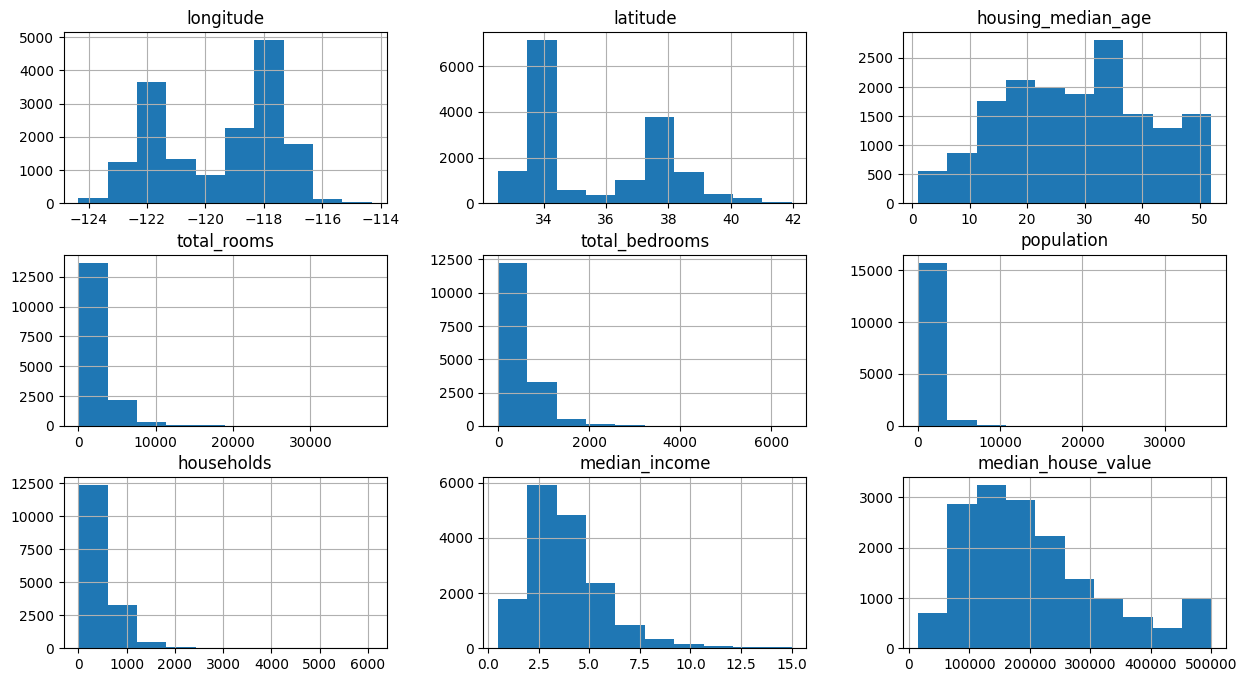

In [ ]:
#histogram
train_data.hist(figsize =(15,8))

<ipython-input-43-acc2883bac58>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

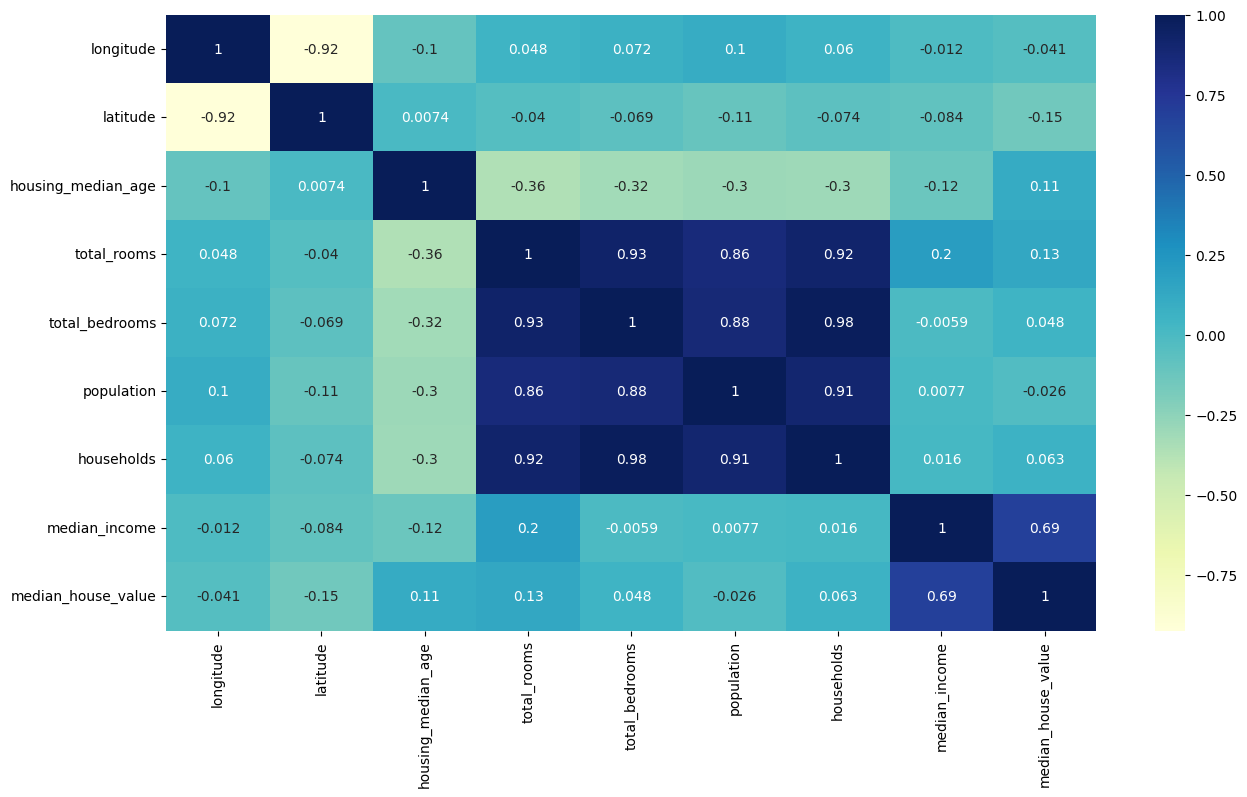

In [ ]:
#correlation with the target variable
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

#2. Data Preprocessing

In [ ]:
#data distribution, add +1 to prevent 0 values
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

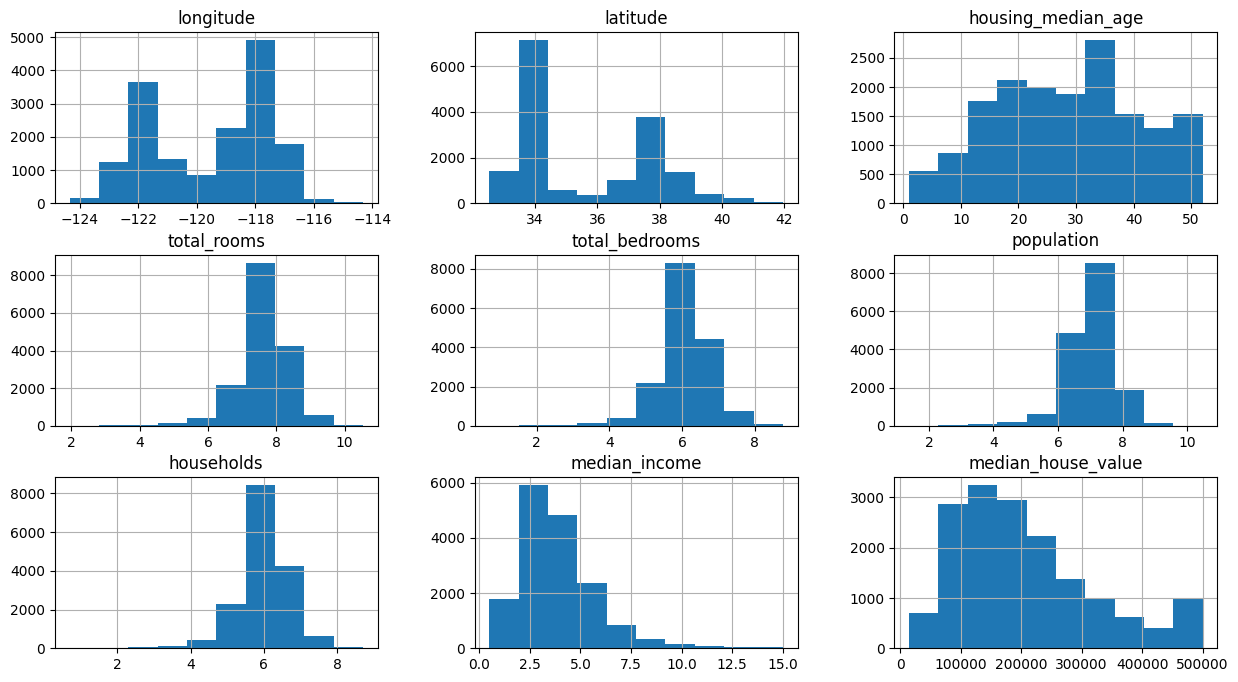

In [ ]:
train_data.hist(figsize=(15,8))
#now we can see the distribution is more even, like a guassian bell

In [ ]:
#we have to change the values of ocean_proximity to numerical. we create a feature for every category and change the value to 1(yes) or 0(no)
print(train_data.ocean_proximity.value_counts())
print(pd.get_dummies(train_data.ocean_proximity))
#then we join the new ocean_proximity to our training data
train_data.join(pd.get_dummies(train_data.ocean_proximity))

<1H OCEAN     7177
INLAND        5217
NEAR OCEAN    2091
NEAR BAY      1857
ISLAND           4
Name: ocean_proximity, dtype: int64
       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
5205           1       0       0         0           0
13264          0       1       0         0           0
3342           0       1       0         0           0
7480           1       0       0         0           0
4245           1       0       0         0           0
...          ...     ...     ...       ...         ...
4390           1       0       0         0           0
16455          0       1       0         0           0
8978           1       0       0         0           0
20036          0       1       0         0           0
1712           0       0       0         1           0

[16346 rows x 5 columns]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5205,-118.29,33.94,47.0,7.486053,5.826000,6.911747,5.799093,2.5398,<1H OCEAN,105700.0,1,0,0,0,0
13264,-117.66,34.10,26.0,7.526179,6.317165,7.012115,6.285998,2.2429,INLAND,150000.0,0,1,0,0,0
3342,-122.62,38.73,21.0,7.262629,5.780744,6.590301,5.662960,2.1474,INLAND,85300.0,0,1,0,0,0
7480,-118.22,33.94,40.0,6.836259,5.556828,7.093405,5.501258,2.5938,<1H OCEAN,115400.0,1,0,0,0,0
4245,-118.32,34.13,34.0,7.526718,5.613128,6.293419,5.579730,4.0833,<1H OCEAN,500001.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4390,-118.26,34.07,28.0,6.363028,5.220356,6.513230,5.313206,2.6250,<1H OCEAN,187500.0,1,0,0,0,0
16455,-121.28,38.12,34.0,8.092239,6.463029,7.553287,6.444131,2.8237,INLAND,110700.0,0,1,0,0,0
8978,-118.41,34.00,38.0,5.783825,4.262680,5.594711,4.304065,2.5500,<1H OCEAN,271400.0,1,0,0,0,0
20036,-118.93,36.10,19.0,8.002694,6.525030,7.411556,6.357842,2.3792,INLAND,90000.0,0,1,0,0,0


In [ ]:
#then drop the ocean_proximity itself because now it is turned into multiple features
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5205,-118.29,33.94,47.0,7.486053,5.826000,6.911747,5.799093,2.5398,105700.0,1,0,0,0,0
13264,-117.66,34.10,26.0,7.526179,6.317165,7.012115,6.285998,2.2429,150000.0,0,1,0,0,0
3342,-122.62,38.73,21.0,7.262629,5.780744,6.590301,5.662960,2.1474,85300.0,0,1,0,0,0
7480,-118.22,33.94,40.0,6.836259,5.556828,7.093405,5.501258,2.5938,115400.0,1,0,0,0,0
4245,-118.32,34.13,34.0,7.526718,5.613128,6.293419,5.579730,4.0833,500001.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4390,-118.26,34.07,28.0,6.363028,5.220356,6.513230,5.313206,2.6250,187500.0,1,0,0,0,0
16455,-121.28,38.12,34.0,8.092239,6.463029,7.553287,6.444131,2.8237,110700.0,0,1,0,0,0
8978,-118.41,34.00,38.0,5.783825,4.262680,5.594711,4.304065,2.5500,271400.0,1,0,0,0,0
20036,-118.93,36.10,19.0,8.002694,6.525030,7.411556,6.357842,2.3792,90000.0,0,1,0,0,0


<Axes: >

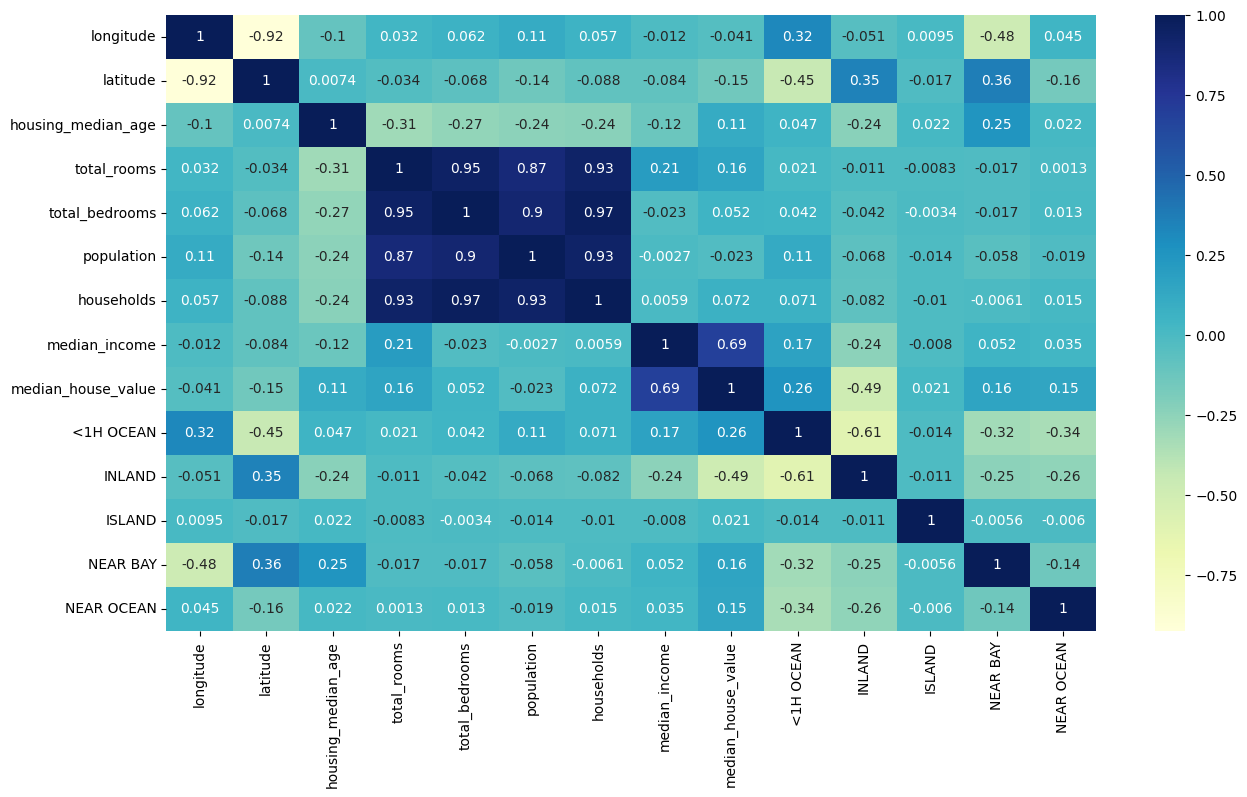

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")